# 05. Logistic regression

#### 1. Download data from https://science.sciencemag.org/content/359/6378/926 (supplementary materials). If you do not succeed, you will find _aar3247_Cohen_SM_Tables-S1-S11.xlsx_ file in the homework's folder.
 - read the actract of the article to get familiar with data origin
 - open the data in excel and get familiar with its content
 - load the protein level data (you need to figure out which one is that) as a pandas dataframe
 - handle missing values and convert features to numeric values when it is needed
 - get rid of the unnecessary (which does not encode protein levels or the tumor type) columns and the CancerSEEK results

#### 2. Predict if a sample is cancerous or not
 - your need to build a classifier that predicts the probability of a sample coming from a cancerous (tumor type is normal or not) person based on the measured protein levels
 - train a logistic regression (sklearn API) on every second sample (not first 50% of the data (!), use every second line)
 - generate prediction for the samples that were not used during the training

#### 3. Comparision to CancerSEEK
 - plot the ROC curve and calculate the confusion matrix for the predictions
 - do the same for the CancerSEEK predictions
 - compare your model's performance to CancerSEEK performance

#### 4. Hepatocellular carcinoma
 - fit a logistic regression (using statsmodels API this time) to predict if a sample has Hepatocellular carcinoma (liver cancer) or not. You need to keep only the liver and the normal samples for this exercise! For fitting use only the first 25 features and all the rows (which are liver or normal)
 - select the 5 best predictor based on P values.
 - Write down the most important features (based on P value) and compare them to the tumor markers that you find on wikipeida https://en.wikipedia.org/wiki/Hepatocellular_carcinoma or other sources!

#### 5. Multiclass classification
 - Again, using every second datapoint train a logistic regression (sklearn API) to predict the tumor type. It is a multiclass classification problem.
 - Generate prediction for the rest of the dataset and show the confusion matrix for the predictions!
 - Plot the ROC curves for the different cancer types on the same plot! 
 - Intepret your results. Which cancer type can be predicted the most reliably?


### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
pd.options.mode.chained_assignment = None  # default='warn'

# Task 1

In [2]:
df = pd.read_excel('aar3247_Cohen_SM_Tables-S1-S11.xlsx', sheet_name='Table S6', skiprows=[0, 1])

In [3]:
df.head()

,Patient ID #,Sample ID #,Tumor type,AJCC Stage,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),...,sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
0,CRC 455,CRC 455 PLS 1,Colorectum,I,1583.45,5598.5,3621.04,5.09,19.08,*16.452,...,*204.792,55.06,6832.07,9368.53,*16.086,21863.7,56428.7,39498.82,0.938342,Positive
1,CRC 456,CRC 456 PLS 1,Colorectum,I,*715.308,20936.3,2772.96,7.27,10.04,40.91,...,*204.792,72.92,5549.47,6224.55,*16.086,29669.7,73940.5,41277.09,0.925363,Positive
2,CRC 457,CRC 457 PLS 1,Colorectum,II,4365.53,2350.93,4120.77,*4.854,16.96,*16.452,...,*204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.3,28440.60,0.852367,Negative
3,CRC 458,CRC 458 PLS 1,Colorectum,II,*715.308,1604.34,2029.96,5.39,8.31,*16.452,...,*204.792,29.47,5856,6121.93,*16.086,4331.02,20441.2,25896.73,0.617639,Negative
4,CRC 459,CRC 459 PLS 1,Colorectum,II,801.3,2087.57,2069.17,*4.854,11.73,*16.452,...,*204.792,78.07,5447.93,6982.32,*16.086,2311.91,56288.5,49425.20,0.318434,Negative


In [4]:
df.isna().sum()

Patient ID #                              1
Sample ID #                               4
Tumor type                                4
AJCC Stage                              816
AFP (pg/ml)                               4
Angiopoietin-2 (pg/ml)                    4
AXL (pg/ml)                              10
CA-125 (U/ml)                             4
CA 15-3 (U/ml)                            4
CA19-9 (U/ml)                             4
CD44 (ng/ml)                             10
CEA (pg/ml)                               4
CYFRA 21-1 (pg/ml)                        4
DKK1 (ng/ml)                              4
Endoglin (pg/ml)                          4
FGF2 (pg/ml)                              4
Follistatin (pg/ml)                       4
Galectin-3 (ng/ml)                        4
G-CSF (pg/ml)                            11
GDF15 (ng/ml)                             4
HE4 (pg/ml)                               4
HGF (pg/ml)                               4
IL-6 (pg/ml)                    

In [5]:
# dropping AJCC Stage column because of too many missing values
df.drop(['AJCC Stage'], axis = 1, inplace = True)

In [6]:
df.head()

,Patient ID #,Sample ID #,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),...,sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
0,CRC 455,CRC 455 PLS 1,Colorectum,1583.45,5598.5,3621.04,5.09,19.08,*16.452,9.81,...,*204.792,55.06,6832.07,9368.53,*16.086,21863.7,56428.7,39498.82,0.938342,Positive
1,CRC 456,CRC 456 PLS 1,Colorectum,*715.308,20936.3,2772.96,7.27,10.04,40.91,27.57,...,*204.792,72.92,5549.47,6224.55,*16.086,29669.7,73940.5,41277.09,0.925363,Positive
2,CRC 457,CRC 457 PLS 1,Colorectum,4365.53,2350.93,4120.77,*4.854,16.96,*16.452,14.59,...,*204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.3,28440.60,0.852367,Negative
3,CRC 458,CRC 458 PLS 1,Colorectum,*715.308,1604.34,2029.96,5.39,8.31,*16.452,7.78,...,*204.792,29.47,5856,6121.93,*16.086,4331.02,20441.2,25896.73,0.617639,Negative
4,CRC 459,CRC 459 PLS 1,Colorectum,801.3,2087.57,2069.17,*4.854,11.73,*16.452,12.21,...,*204.792,78.07,5447.93,6982.32,*16.086,2311.91,56288.5,49425.20,0.318434,Negative


In [7]:
# dropping unnecessary columns
df.drop(['Patient ID #', 'Sample ID #', 'CancerSEEK Test Result'], axis=1, inplace=True)

In [8]:
df.head()

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),...,sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score
0,Colorectum,1583.45,5598.5,3621.04,5.09,19.08,*16.452,9.81,540.07,*1938.654,...,3284.17,*204.792,55.06,6832.07,9368.53,*16.086,21863.7,56428.7,39498.82,0.938342
1,Colorectum,*715.308,20936.3,2772.96,7.27,10.04,40.91,27.57,5902.43,*1938.654,...,1911.81,*204.792,72.92,5549.47,6224.55,*16.086,29669.7,73940.5,41277.09,0.925363
2,Colorectum,4365.53,2350.93,4120.77,*4.854,16.96,*16.452,14.59,973.75,1976.94,...,1743.94,*204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.3,28440.60,0.852367
3,Colorectum,*715.308,1604.34,2029.96,5.39,8.31,*16.452,7.78,2027.53,*1938.654,...,1059.24,*204.792,29.47,5856,6121.93,*16.086,4331.02,20441.2,25896.73,0.617639
4,Colorectum,801.3,2087.57,2069.17,*4.854,11.73,*16.452,12.21,614.49,*1938.654,...,1736.92,*204.792,78.07,5447.93,6982.32,*16.086,2311.91,56288.5,49425.20,0.318434


In [9]:
# dropping the * character in the values
for i in df.columns:
    df[i] = df[i].astype(str).str.replace('*', '', regex=True)

In [10]:
# converting to numeric
df[df.columns[1:]] = df[df.columns[1:]].apply(pd.to_numeric, errors='coerce')

In [11]:
df.head()

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),...,sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score
0,Colorectum,1583.450,5598.50,3621.04,5.090,19.08,16.452,9.81,540.07,1938.654,...,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,0.938342
1,Colorectum,715.308,20936.35,2772.96,7.270,10.04,40.910,27.57,5902.43,1938.654,...,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,0.925363
2,Colorectum,4365.530,2350.93,4120.77,4.854,16.96,16.452,14.59,973.75,1976.940,...,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,0.852367
3,Colorectum,715.308,1604.34,2029.96,5.390,8.31,16.452,7.78,2027.53,1938.654,...,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,0.617639
4,Colorectum,801.300,2087.57,2069.17,4.854,11.73,16.452,12.21,614.49,1938.654,...,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,0.318434


In [12]:
# replacing missing values with mean of column
df.fillna(df.mean(), inplace=True)
# dropping rows where Tumor type is missing
df.drop(df.tail(4).index, inplace = True)

In [13]:
df.isna().sum()

Tumor type                              0
AFP (pg/ml)                             0
Angiopoietin-2 (pg/ml)                  0
AXL (pg/ml)                             0
CA-125 (U/ml)                           0
CA 15-3 (U/ml)                          0
CA19-9 (U/ml)                           0
CD44 (ng/ml)                            0
CEA (pg/ml)                             0
CYFRA 21-1 (pg/ml)                      0
DKK1 (ng/ml)                            0
Endoglin (pg/ml)                        0
FGF2 (pg/ml)                            0
Follistatin (pg/ml)                     0
Galectin-3 (ng/ml)                      0
G-CSF (pg/ml)                           0
GDF15 (ng/ml)                           0
HE4 (pg/ml)                             0
HGF (pg/ml)                             0
IL-6 (pg/ml)                            0
IL-8 (pg/ml)                            0
Kallikrein-6 (pg/ml)                    0
Leptin (pg/ml)                          0
Mesothelin (ng/ml)                

In [14]:
df1 = df.copy()

In [15]:
# encoding the labels for the binary classification
for j in range(len(df['Tumor type'])):
    if df['Tumor type'][j] == 'Normal':
        df1['Tumor type'][j] = 0
    else:
        df1['Tumor type'][j] = 1

In [16]:
df1 = df1.apply(pd.to_numeric)
df1.head()

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),...,sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score
0,1,1583.450,5598.50,3621.04,5.090,19.08,16.452,9.81,540.07,1938.654,...,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,0.938342
1,1,715.308,20936.35,2772.96,7.270,10.04,40.910,27.57,5902.43,1938.654,...,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,0.925363
2,1,4365.530,2350.93,4120.77,4.854,16.96,16.452,14.59,973.75,1976.940,...,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,0.852367
3,1,715.308,1604.34,2029.96,5.390,8.31,16.452,7.78,2027.53,1938.654,...,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,0.617639
4,1,801.300,2087.57,2069.17,4.854,11.73,16.452,12.21,614.49,1938.654,...,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,0.318434


In [17]:
# saving CancerSEEK data for later use
cancerseek = df1['CancerSEEK Logistic Regression Score']
df1 = df1.drop(['CancerSEEK Logistic Regression Score'], axis=1)

# Task 2

In [18]:
y = df1['Tumor type']
df2 = df1.drop(['Tumor type'], axis=1)

In [19]:
train_X = df2.iloc[::2, :]
train_y = y.iloc[0::2]
test_X = df2.iloc[1::2, :]
test_y = y[1::2]

In [20]:
# normalizing the data
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.fit_transform(test_X)

In [21]:
# training the logistic regression
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(random_state=0).fit(train_X, train_y)

In [22]:
predicted = lr.predict(test_X)

# Task 3

In [23]:
# converting the predictions to probabilities
prob_y = lr.predict_proba(test_X)

In [24]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix


fpr, tpr, thresholds= roc_curve(y_score=prob_y[:,1], y_true=test_y)
roc_auc = roc_auc_score(test_y, prob_y[:,1])

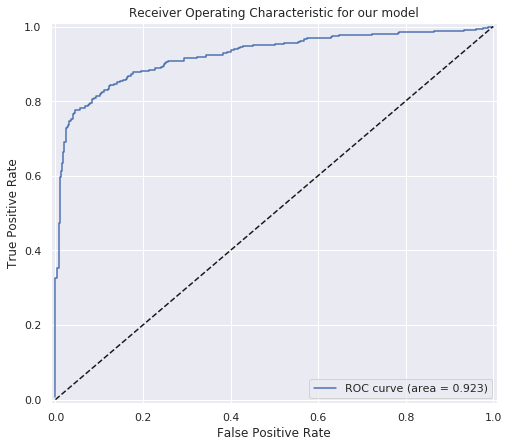

In [25]:
plt.figure(figsize=(8, 7))
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for our model')
plt.legend(loc="lower right")

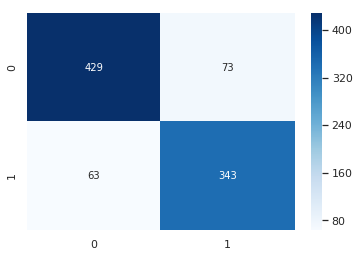

In [26]:
cm = confusion_matrix(test_y, predicted, labels=[1, 0])

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

In [27]:
tn, fp, fn, tp = cm.ravel()
print('True Negative:', tn, '\nFalse Positive:', fp, '\nFalse Negative:', fn, '\nTrue Positive:', tp)

True Negative: 429 
False Positive: 73 
False Negative: 63 
True Positive: 343


Out of all positive cases how many our predicted correctly? (TP/TP+FN)

In [28]:
print('True Positive Rate=', cm[1][1]/(cm[1][1]+cm[1][0]))

True Positive Rate= 0.8448275862068966


Out of all negative cases how many are predicted to be positive? (FP/TN+FP)

In [29]:
print('Fale Positive Rate=', cm[0][1]/(cm[0][0]+cm[0][1]))

Fale Positive Rate= 0.1454183266932271


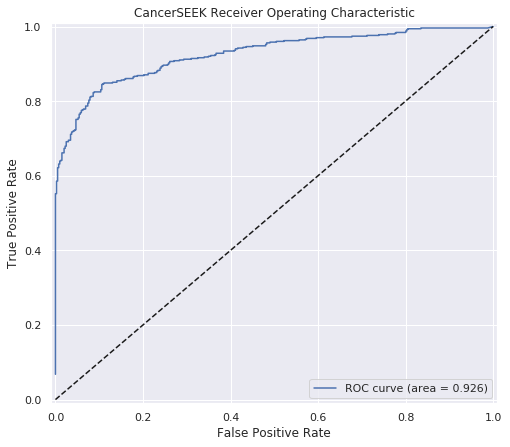

In [30]:
cancerseek_y = np.array(cancerseek.iloc[1::2])

fpr2, tpr2, thresholds2= roc_curve(y_score=cancerseek_y, y_true=test_y)
roc_auc2 = roc_auc_score(test_y, cancerseek_y)

plt.figure(figsize=(8, 7))
plt.plot(fpr2, tpr2, label='ROC curve (area = %0.3f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CancerSEEK Receiver Operating Characteristic')
plt.legend(loc="lower right")

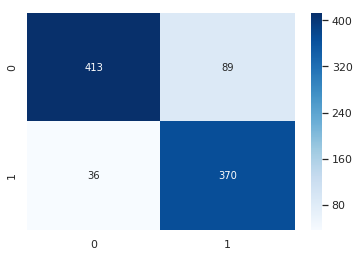

In [31]:
cancerseek_y2 = []

for i in range(len(cancerseek_y)):
    if cancerseek_y[i] < 0.5:
        cancerseek_y2.append(0)
    else:
        cancerseek_y2.append(1)

cm2 = confusion_matrix(test_y, cancerseek_y2, labels=[1, 0])

sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g')

In [32]:
tn2, fp2, fn2, tp2 = cm2.ravel()
print('True Negative:', tn2, '\nFalse Positive:', fp2, '\nFalse Negative:', fn2, '\nTrue Positive:', tp2)

True Negative: 413 
False Positive: 89 
False Negative: 36 
True Positive: 370


Out of all positive cases how many our predicted correctly? (TP/TP+FN)

In [33]:
print('True Positive Rate=', cm2[1][1]/(cm2[1][1]+cm2[1][0]))

True Positive Rate= 0.9113300492610837


Out of all negative cases how many are predicted to be positive? (FP/TN+FP)

In [34]:
print('Fale Positive Rate=', cm2[0][1]/(cm2[0][0]+cm2[0][1]))

Fale Positive Rate= 0.17729083665338646


Our model has just a little lower area under the ROC curve so we might think it is close to the CancerSEEK model in performance, but the difference in TPR in my opinon is too high. It might have lower FPR, but in cancer detection catching more true positives (and with that having fewer missed cases) is more important than getting a little less false positives.

# Task 4

In [35]:
df.head()

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),...,sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score
0,Colorectum,1583.450,5598.50,3621.04,5.090,19.08,16.452,9.81,540.07,1938.654,...,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,0.938342
1,Colorectum,715.308,20936.35,2772.96,7.270,10.04,40.910,27.57,5902.43,1938.654,...,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,0.925363
2,Colorectum,4365.530,2350.93,4120.77,4.854,16.96,16.452,14.59,973.75,1976.940,...,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,0.852367
3,Colorectum,715.308,1604.34,2029.96,5.390,8.31,16.452,7.78,2027.53,1938.654,...,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,0.617639
4,Colorectum,801.300,2087.57,2069.17,4.854,11.73,16.452,12.21,614.49,1938.654,...,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,0.318434


In [36]:
df4 = pd.DataFrame(df)

In [37]:
# we only need the liver cancer positive rows
df4 = df4[(df4['Tumor type'] == 'Liver') | (df4['Tumor type'] == 'Normal')]

In [38]:
# using only the first 25 features
y2 = list(df4['Tumor type'])
df4 = df4.iloc[:, 1: 26]

In [39]:
df4.head()

,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),...,GDF15 (ng/ml),HE4 (pg/ml),HGF (pg/ml),IL-6 (pg/ml),IL-8 (pg/ml),Kallikrein-6 (pg/ml),Leptin (pg/ml),Mesothelin (ng/ml),Midkine (pg/ml),Myeloperoxidase (ng/ml)
145,7843.860,1644.30,2868.99,9.570,12.85,41.970,21.06,3104.41,4152.370,0.66,...,1.17,22122.730,1360.07,164.220,15.060,4572.12,6737.34,11.33,236.49,41.91
146,2030.920,852.82,762.79,4.896,21.49,26.390,13.78,1783.26,5189.040,0.64,...,0.54,3835.158,508.47,82.310,14.500,1879.15,7408.66,9.68,259.41,123.99
147,959.916,4155.29,1302.39,4.896,22.27,16.134,11.76,1552.65,1918.914,0.63,...,1.39,3835.158,1156.25,225.560,35.040,3956.49,29138.73,16.68,205.04,140.63
148,7417.290,937.12,7194.25,4.770,5.79,15.798,17.12,978.05,6202.710,0.82,...,1.00,3743.160,392.89,3.036,27.762,5969.76,5231.40,28.10,2109.50,12.14
188,600608.892,2242.08,1047.07,6.290,9.58,50.350,8.98,1530.86,6047.910,1.54,...,1.15,4209.156,856.85,193.800,60.820,1901.10,14621.68,12.86,557.13,496.86


In [40]:
# encoding the labels
y2 = [0 if i== 'Normal' else 1 for i in y2]

In [41]:
df4_s = scaler.fit_transform(df4)

In [42]:
# fitting the statsmodel logistic regression
from statsmodels.discrete.discrete_model import Logit


logit = Logit(y2, df4_s).fit()

Optimization terminated successfully.
         Current function value: 0.092691
         Iterations 12


In [43]:
print(logit.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  856
Model:                          Logit   Df Residuals:                      831
Method:                           MLE   Df Model:                           24
Date:                Thu, 08 Oct 2020   Pseudo R-squ.:                  0.5425
Time:                        17:50:38   Log-Likelihood:                -79.343
converged:                       True   LL-Null:                       -173.44
                                        LLR p-value:                 1.968e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            27.8590      2.976      9.360      0.000      22.026      33.692
x2            -1.3980      0.513     -2.724      0.006      -2.404      -0.392
x3             0.1993      0.253      0.787      0.4

The best predictors based on p-values are the ones with the lowest p-values:<br>
AFP (pg/ml)<br>
CA-125 (U/ml)<br>
HGF (pg/ml)<br>
GDF15 (ng/ml)<br>
Angiopoietin-2 (pg/ml)

AFP seems to be the most widely used tumor marker, we predicted this right. HCC removes hepatocyte growth factor (HGF), so that could be a right predicton as well. The other 3 predictors I couldn't find on the site listed as source below.<br>
Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3915636/


# Task 5

### Tumor types:
0 - Breast<br>
1 - Colorectum<br>
2 - Esophagus<br>
3 - Liver<br>
4 - Lung<br>
5 - Ovary<br>
6 - Pancreas<br>
7 - Stomach

In [44]:
df5 = df.drop(['CancerSEEK Logistic Regression Score'], axis=1)
df5 = df5[df5['Tumor type'] != 'Normal']

In [45]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
le.fit(['Breast', 'Colorectum', 'Esophagus', 'Liver', 'Lung', 'Ovary', 'Pancreas', 'Stomach'])

LabelEncoder()

In [46]:
df5['Tumor type'] = le.transform(df5['Tumor type'])

In [47]:
y5 = df5['Tumor type']
df5 = df5.drop(['Tumor type'], axis=1)

In [48]:
df5.head()

,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),...,Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml)
0,1583.450,5598.50,3621.04,5.090,19.08,16.452,9.81,540.07,1938.654,0.78,...,11606.60,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82
1,715.308,20936.35,2772.96,7.270,10.04,40.910,27.57,5902.43,1938.654,0.77,...,14374.99,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09
2,4365.530,2350.93,4120.77,4.854,16.96,16.452,14.59,973.75,1976.940,0.90,...,38375.00,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60
3,715.308,1604.34,2029.96,5.390,8.31,16.452,7.78,2027.53,1938.654,0.64,...,12072.51,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73
4,801.300,2087.57,2069.17,4.854,11.73,16.452,12.21,614.49,1938.654,0.78,...,23718.17,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20


In [49]:
train_X5 = df5.iloc[::2, :]
train_y5 = y5.iloc[0::2]
test_X5 = df5.iloc[1::2, :]
test_y5 = y5[1::2]

In [50]:
train_X5 = scaler.fit_transform(train_X5)
test_X5 = scaler.fit_transform(test_X5)

In [51]:
lr5 = LogisticRegression(random_state=0).fit(train_X5, train_y5)

In [52]:
predicted5 = lr.predict(test_X5)

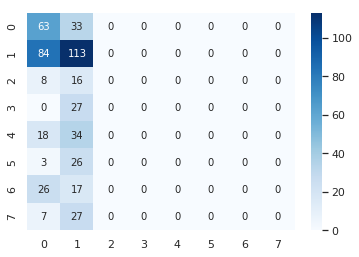

In [53]:
# confusion matrix for multiclass classification
cm5 = confusion_matrix(test_y5, predicted5)

sns.heatmap(cm5, annot=True, cmap='Blues', fmt='g')

In [54]:
from sklearn.multiclass import OneVsRestClassifier


# using OneVsRest tpo be able to use ROC curve
clf = OneVsRestClassifier(LogisticRegression(random_state=0))
y_score5 = clf.fit(train_X5, train_y5).decision_function(test_X5)

In [55]:
from sklearn.preprocessing import label_binarize


# binarizing the labels
test_y5 = label_binarize(test_y5, classes=[0, 1, 2, 3, 4, 5, 6, 7])

In [56]:
# computing ROC curve and ROC area for each class
fpr5 = dict()
tpr5 = dict()
roc_auc5 = dict()

for i in range(8):
    fpr5[i], tpr5[i], _ = roc_curve(test_y5[:, i], y_score5[:, i])
    roc_auc5[i] = auc(fpr5[i], tpr5[i])

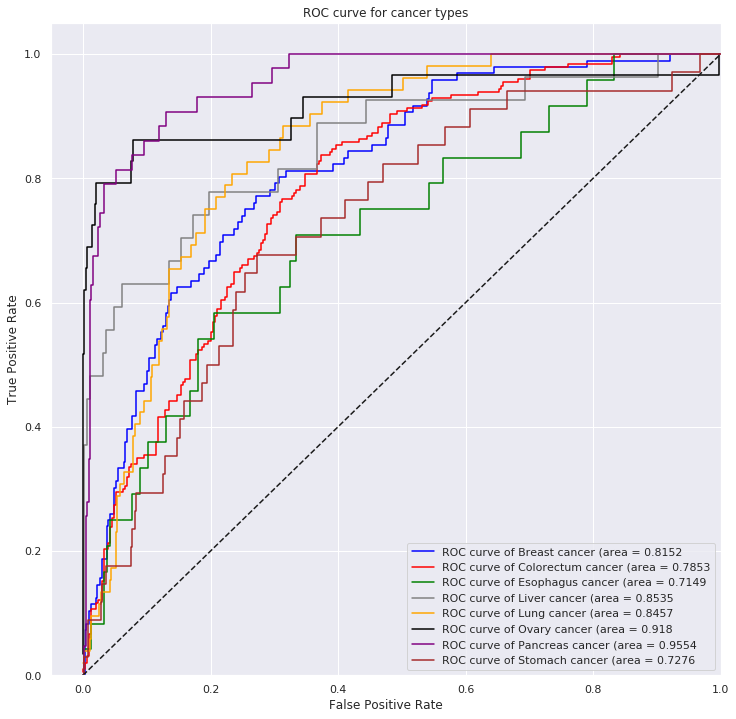

In [57]:
from itertools import cycle


# plot of a ROC curve for a specific class
labels = ['Breast', 'Colorectum', 'Esophagus', 'Liver', 'Lung', 'Ovary', 'Pancreas', 'Stomach']

colors = ['blue', 'red', 'green', 'gray', 'orange', 'black', 'purple', 'brown']

plt.figure(figsize=(12, 12))
for i, color in zip(range(8), colors):
    
    plt.plot(fpr5[i], tpr5[i], color=color, lw=1.5, label=f'ROC curve of {labels[i]} cancer (area = {round(roc_auc5[i], 4)}')
    

plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for cancer types')
plt.legend(loc="lower right")
plt.show()

Pancreas cancer could be predicted most reliable since it has the highest area under the ROC curve.